In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ek18 = pd.read_csv('data/EK_2018_merged.csv')
ek19 = pd.read_csv('data/EK_2019_merged.csv')
ek20 = pd.read_csv('data/EK_2020_merged.csv')
ek21 = pd.read_csv('data/EK_2021_merged.csv')
ek22 = pd.read_csv('data/EK_2022_merged.csv')
ek23 = pd.read_csv('data/EK_2023_merged.csv')

/tmp/ipykernel_511145/377269086.py:1: DtypeWarning: Columns (17,23,28,31,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  ek18 = pd.read_csv('data/EK_2018_merged.csv')
/tmp/ipykernel_511145/377269086.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  ek19 = pd.read_csv('data/EK_2019_merged.csv')


In [3]:
merged = pd.concat((ek18, ek19, ek20, ek21, ek22, ek23))

In [4]:
merged.head()

,FINANCIAL_YEAR_AND_PERIOD,ORIGIN_DEPARTURE_DATE,TRUST_TRAIN_ID_AFFECTED,PLANNED_ORIG_LOC_CODE_AFF,PLANNED_ORIG_GBTT_DATETIME_AFF,PLANNED_ORIG_WTT_DATETIME_AFF,PLANNED_DEST_LOC_CODE_AFFECTED,PLANNED_DEST_GBTT_DATETIME_AFF,PLANNED_DEST_WTT_DATETIME_AFF,TRAIN_SERVICE_CODE_AFFECTED,...,PFPI_MINUTES,RESP_TRAIN,REACT_TRAIN,Lat_OR,Lon_OR,STATION_OR,Lat_DES,Lon_DES,STATION_DES,INCIDENT_REASON_DESCRIPTION
0,2018/19_P01,2018-04-01,502V19MF01,50392.0,2018-04-01 09:54:00,2018-04-01 09:54:00,50401.0,2018-04-01 10:03:00,2018-04-01 10:03:00,21237001,...,0.0,NaN,NaN,51.559108,0.250912,Upminster Rail Station,51.559108,0.250912,Upminster Rail Station,System generated cancellation (NOT to be attri...
1,2018/19_P01,2018-04-01,502V36MO01,50401.0,2018-04-01 14:11:00,2018-04-01 14:11:00,50392.0,2018-04-01 14:20:00,2018-04-01 14:20:00,21237001,...,0.0,NaN,NaN,51.574830,0.183264,Romford Rail Station,51.574830,0.183264,Romford Rail Station,System generated cancellation (NOT to be attri...
2,2018/19_P01,2018-04-01,502V59MY01,50392.0,2018-04-01 19:54:00,2018-04-01 19:54:00,50401.0,2018-04-01 20:03:00,2018-04-01 20:03:00,21237001,...,0.0,NaN,NaN,51.559108,0.250912,Upminster Rail Station,51.559108,0.250912,Upminster Rail Station,System generated cancellation (NOT to be attri...
3,2018/19_P01,2018-04-01,502V35MN01,50392.0,2018-04-01 13:54:00,2018-04-01 13:54:00,50401.0,2018-04-01 14:03:00,2018-04-01 14:03:00,21237001,...,0.0,NaN,NaN,51.559108,0.250912,Upminster Rail Station,51.559108,0.250912,Upminster Rail Station,System generated cancellation (NOT to be attri...
4,2018/19_P01,2018-04-01,502V49MU01,50392.0,2018-04-01 17:24:00,2018-04-01 17:24:00,50401.0,2018-04-01 17:33:00,2018-04-01 17:33:00,21237001,...,0.0,NaN,NaN,51.559108,0.250912,Upminster Rail Station,51.559108,0.250912,Upminster Rail Station,System generated cancellation (NOT to be attri...


In [5]:
merged.drop(columns=['TRAILING_LOAD_AFFECTED','TIMING_LOAD_AFFECTED'], inplace=True)

In [6]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790295 entries, 0 to 23301
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   FINANCIAL_YEAR_AND_PERIOD       790295 non-null  object 
 1   ORIGIN_DEPARTURE_DATE           790295 non-null  object 
 2   TRUST_TRAIN_ID_AFFECTED         790295 non-null  object 
 3   PLANNED_ORIG_LOC_CODE_AFF       790295 non-null  float64
 4   PLANNED_ORIG_GBTT_DATETIME_AFF  692043 non-null  object 
 5   PLANNED_ORIG_WTT_DATETIME_AFF   790295 non-null  object 
 6   PLANNED_DEST_LOC_CODE_AFFECTED  790295 non-null  float64
 7   PLANNED_DEST_GBTT_DATETIME_AFF  692043 non-null  object 
 8   PLANNED_DEST_WTT_DATETIME_AFF   790295 non-null  object 
 9   TRAIN_SERVICE_CODE_AFFECTED     790295 non-null  int64  
 10  SERVICE_GROUP_CODE_AFFECTED     790295 non-null  object 
 11  OPERATOR_AFFECTED               790295 non-null  object 
 12  ENGLISH_DAY_TYPE 

In [7]:
cols = merged.isnull().sum()
invest = [merged.columns[col] for col in range(len(cols)) if cols[col] != 0]

In [8]:
merged['PLANNED_ORIG_GBTT_DATETIME_AFF'].value_counts()

2023-04-13 19:19:00    37
2022-02-15 10:21:00    31
2022-04-21 21:47:00    30
2019-03-12 10:01:00    29
2020-02-14 18:36:00    29
                       ..
2021-03-02 18:22:00     1
2021-05-02 21:02:00     1
2021-05-02 23:32:00     1
2021-05-02 17:52:00     1
2023-05-25 08:20:00     1
Name: PLANNED_ORIG_GBTT_DATETIME_AFF, Length: 398205, dtype: int64

In [9]:
invest

['PLANNED_ORIG_GBTT_DATETIME_AFF',
 'PLANNED_DEST_GBTT_DATETIME_AFF',
 'TRACTION_TYPE_AFFECTED',
 'UNIT_CLASS_AFFECTED',
 'INCIDENT_NUMBER',
 'INCIDENT_START_DATETIME',
 'INCIDENT_END_DATETIME',
 'SECTION_CODE',
 'NETWORK_RAIL_LOCATION_MANAGER',
 'RESPONSIBLE_MANAGER',
 'INCIDENT_REASON',
 'ATTRIBUTION_STATUS',
 'INCIDENT_EQUIPMENT',
 'INCIDENT_DESCRIPTION',
 'REACTIONARY_REASON_CODE',
 'INCIDENT_RESPONSIBLE_TRAIN',
 'PFPI_MINUTES',
 'RESP_TRAIN',
 'REACT_TRAIN',
 'Lat_OR',
 'Lon_OR',
 'STATION_OR',
 'Lat_DES',
 'Lon_DES',
 'STATION_DES']

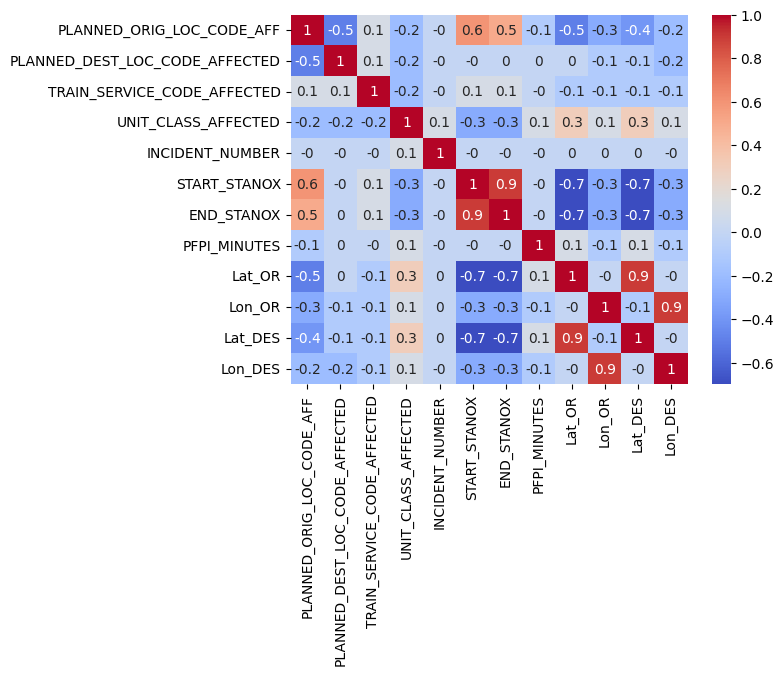

In [10]:
sns.heatmap(round(merged.corr(), 1), cmap='coolwarm', annot=True);

In [11]:
test_df = merged.drop(columns=['FINANCIAL_YEAR_AND_PERIOD', 'END_STANOX', 'START_STANOX', 
                               'PLANNED_ORIG_LOC_CODE_AFF', 'INCIDENT_NUMBER', 'NETWORK_RAIL_LOCATION_MANAGER',
                               
                              
                              
                              ])

In [12]:
test_df.columns

Index(['ORIGIN_DEPARTURE_DATE', 'TRUST_TRAIN_ID_AFFECTED',
       'PLANNED_ORIG_GBTT_DATETIME_AFF', 'PLANNED_ORIG_WTT_DATETIME_AFF',
       'PLANNED_DEST_LOC_CODE_AFFECTED', 'PLANNED_DEST_GBTT_DATETIME_AFF',
       'PLANNED_DEST_WTT_DATETIME_AFF', 'TRAIN_SERVICE_CODE_AFFECTED',
       'SERVICE_GROUP_CODE_AFFECTED', 'OPERATOR_AFFECTED', 'ENGLISH_DAY_TYPE',
       'APP_TIMETABLE_FLAG_AFF', 'TRAIN_SCHEDULE_TYPE_AFFECTED',
       'TRACTION_TYPE_AFFECTED', 'UNIT_CLASS_AFFECTED', 'INCIDENT_CREATE_DATE',
       'INCIDENT_START_DATETIME', 'INCIDENT_END_DATETIME', 'SECTION_CODE',
       'NETWORK_RAIL_LOCATION_MANAGER', 'RESPONSIBLE_MANAGER',
       'INCIDENT_REASON', 'ATTRIBUTION_STATUS', 'INCIDENT_EQUIPMENT',
       'INCIDENT_DESCRIPTION', 'REACTIONARY_REASON_CODE',
       'INCIDENT_RESPONSIBLE_TRAIN', 'PERFORMANCE_EVENT_CODE',
       'EVENT_DATETIME', 'PFPI_MINUTES', 'RESP_TRAIN', 'REACT_TRAIN', 'Lat_OR',
       'Lon_OR', 'STATION_OR', 'Lat_DES', 'Lon_DES', 'STATION_DES',
       'INCIDENT_REA

In [ ]:
merged[['REACTIONARY_REASON_CODE']]